# Laboratorio Canciones

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             make_scorer, roc_auc_score)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  # Corregido aquí
from sklearn.svm import SVC
from xgboost import XGBClassifier


**1.CARGANDO Y VISUALIZANDO DATOS**

Cargamos el conjunto de datos y revisamos las estadísticas generales, como la media, el conteo y la mediana.







In [193]:
dataframe = pd.read_csv('/content/drive/MyDrive/Canciones_Spotify.csv')
dataframe.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist;
0,0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,150.062,4.0,0.286,1.0,Mask Off,Future;
1,1,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,160.083,4.0,0.588,1.0,Redbone,Childish Gambino;
2,2,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,75.044,4.0,0.173,1.0,Xanny Family,Future;
3,3,0.6040,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,86.468,4.0,0.230,1.0,Master Of None,Beach House;
4,4,0.1800,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,174.004,4.0,0.904,1.0,Parallel Lines,Junior Boys;


In [194]:
dataframe.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1949.000000,1949.000000,1.949000e+03,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000,1949.000000
mean,0.181632,0.621309,2.454509e+05,0.686153,0.132473,5.321190,0.190777,-6.971041,0.612109,0.092412,121.895048,3.971780,0.498064,0.509492
std,0.253052,0.158752,8.008218e+04,0.205289,0.272518,3.647517,0.155416,3.467898,0.487395,0.089494,26.486987,0.241326,0.245731,0.500038
min,0.000003,0.122000,1.604200e+04,0.016100,0.000000,0.000000,0.018800,-29.460000,0.000000,0.023100,59.385000,3.000000,0.034800,0.000000
25%,0.009470,0.517000,1.999730e+05,0.567000,0.000000,2.000000,0.092200,-8.350000,0.000000,0.037500,100.959000,4.000000,0.298000,0.000000
50%,0.060800,0.633000,2.292610e+05,0.719000,0.000075,6.000000,0.126000,-6.239000,1.000000,0.054900,121.986000,4.000000,0.493000,1.000000
75%,0.251000,0.739000,2.688400e+05,0.848000,0.053900,9.000000,0.247000,-4.736000,1.000000,0.108000,137.905000,4.000000,0.690000,1.000000
max,0.992000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [195]:
print(dataframe.keys())

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist;'],
      dtype='object')


**2.LIMPIEZA DE VALORES NAN**

In [196]:
pd.isnull(dataframe).sum()

Unnamed: 0           0
acousticness        68
danceability        68
duration_ms         68
energy              68
instrumentalness    68
key                 68
liveness            68
loudness            68
mode                68
speechiness         68
tempo               68
time_signature      68
valence             68
target              68
song_title          68
artist;             68
dtype: int64

In [197]:
def limpiar_dataset(dataset):
    # Eliminar la columna "Unnamed: 0", que parece ser un índice
    dataset = dataset.drop("Unnamed: 0", axis=1)

    dataset = dataset.fillna(dataset.mean())

    # También puedes eliminar las columnas que no son necesarias para el modelo
    columnas_no_necesarias = ['song_title', 'artist;']
    dataset = dataset.drop(columnas_no_necesarias, axis=1)

    return dataset
# Aplicar la función para limpiar el conjunto de datos
dataset_copia = limpiar_dataset(dataframe)


<ipython-input-197-973f9c1117c1>:5: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [198]:
pd.isnull(dataset_copia).sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
dtype: int64

**3.ANALISIS EXPLORATORIO**

Investigamos las tendencias generales en los datos para obtener una  idea de qué variables se correlacionan entre sí, así como otras asociaciones.

<ipython-input-199-59c2514fc761>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




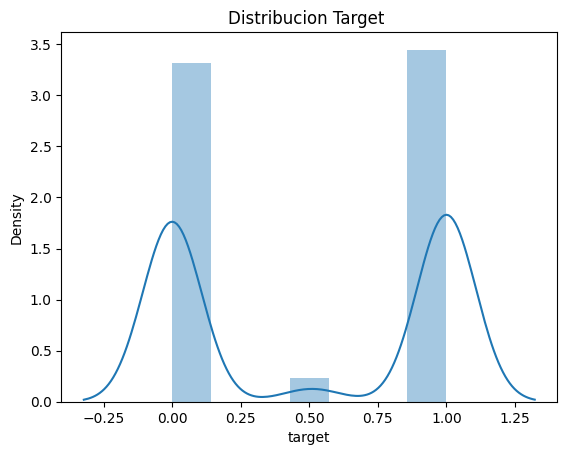

In [199]:
sns.distplot(dataset_copia['target']).set_title('Distribucion Target ')
plt.show()

In [200]:
dataset_copia.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
acousticness,1.000000,-0.135775,0.056726,-0.628778,0.120821,-0.087761,-0.114878,-0.531921,0.069730,-0.094963,-0.118421,-0.181067,-0.129508,-0.118038
danceability,-0.135775,1.000000,0.030292,-0.003941,-0.112863,0.025744,-0.135830,0.040502,-0.047507,0.139496,-0.157954,0.125218,0.433959,0.167460
duration_ms,0.056726,0.030292,1.000000,-0.137061,0.307456,0.020295,0.012886,-0.274224,-0.075981,-0.080835,-0.077540,-0.047574,-0.118447,0.151991
energy,-0.628778,-0.003941,-0.137061,1.000000,-0.099217,0.074475,0.214576,0.753172,-0.072480,0.087337,0.156203,0.176076,0.254279,0.023005
instrumentalness,0.120821,-0.112863,0.307456,-0.099217,1.000000,-0.006431,0.005855,-0.337759,-0.029754,-0.152701,0.008193,-0.063438,-0.181475,0.164366
key,-0.087761,0.025744,0.020295,0.074475,-0.006431,1.000000,0.049357,0.049382,-0.190343,0.023619,0.032756,0.021383,0.031443,0.037169
liveness,-0.114878,-0.135830,0.012886,0.214576,0.005855,0.049357,1.000000,0.161649,-0.012810,0.077458,-0.002311,0.026511,-0.064159,0.017793
loudness,-0.531921,0.040502,-0.274224,0.753172,-0.337759,0.049382,0.161649,1.000000,-0.043264,0.081080,0.146309,0.130129,0.169617,-0.105864
mode,0.069730,-0.047507,-0.075981,-0.072480,-0.029754,-0.190343,-0.012810,-0.043264,1.000000,-0.046090,-0.056351,-0.040738,-0.027077,-0.064926
speechiness,-0.094963,0.139496,-0.080835,0.087337,-0.152701,0.023619,0.077458,0.081080,-0.046090,1.000000,0.109546,0.134268,0.049077,0.145377


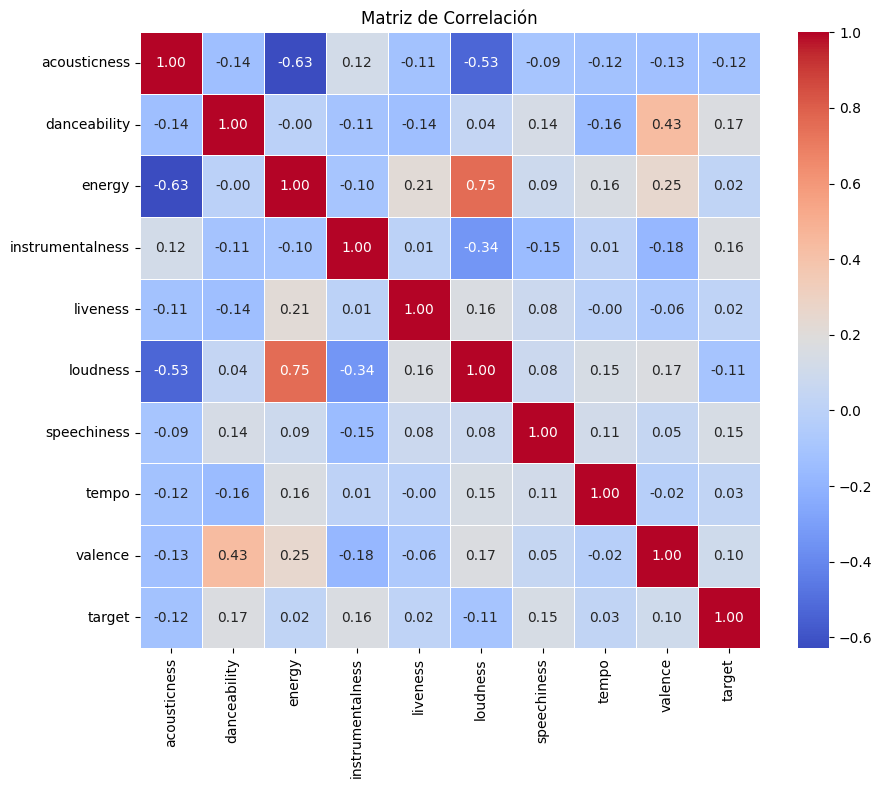

In [201]:
# Seleccionar las columnas relevantes para el análisis de correlación
columns_of_interest = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
                        'loudness', 'speechiness', 'tempo', 'valence', 'target']

# Crear un subconjunto del DataFrame con estas columnas
subset_df = dataset_copia[columns_of_interest]

# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


Lo que más salta a la vista es que hay una fuerte relación directa entre los atributos loudness y energy.

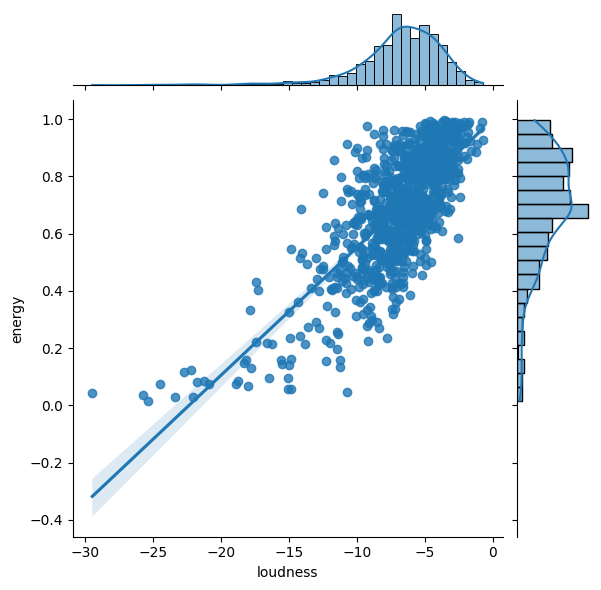

In [202]:
g = sns.jointplot(x='loudness', y='energy', data=dataset_copia.sample(1000), kind='reg');

De acuerdo a lo obtenido en el grafico anterior, seleccionaremos las siguientes características: acousticness, danceability,instrumentalness, energy,speeciness y valence.

In [203]:
features = ['danceability', 'valence', 'speechiness', 'acousticness', 'energy', 'instrumentalness']
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"target vs {feature}" for feature in features],
    horizontal_spacing=0.1, vertical_spacing=0.15
)
# Definir colores para el target y las features
target_colors = {'0': 'red', '1': 'blue'}
feature_color = 'lightgray'

# Iterar sobre las características y crear un gráfico de cajas para cada una
for i, feature in enumerate(features):
    row, col = divmod(i, 3)

    # Crear gráfico de cajas
    box_fig = px.box(
        dataset_copia,
        x='target',
        y=feature,
        points="all",
        title=f"target vs {feature}",
        color='target',
        color_discrete_map=target_colors,
        height=400,
    )

    # Actualizar colores del trazo y relleno
    box_fig.update_traces(
        marker=dict(color=feature_color),
        line=dict(color='black'),  # Color del trazo del boxplot
    )

    box_fig.update_layout(showlegend=False)
    fig.add_trace(box_fig.data[0], row=row+1, col=col+1)

# Configuración del diseño general
fig.update_layout(
    height=800,
    width=1200,
    title_text="Gráficos de Cajas",
    showlegend=False,  # Ocultar leyendas
    font=dict(family="Arial", size=10),
)


fig.update_layout(coloraxis_colorbar=dict(
    tickvals=[0, 1],
    ticktext=['No', 'Sí'],
    title='Target'
))

fig.show()




**4.SELECCIÓN COLUMNAS CARACTERÍSTICAS Y DIVISION DE DATOS**

In [204]:
#Seleccion columnas características
features = ['danceability', 'loudness', 'valence', 'speechiness', 'acousticness', 'energy']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataset_copia[features], dataset_copia["target"], test_size=0.2, random_state=42)

# Binarizar la columna 'target'
dataset_copia['target'] = np.where(dataset_copia['target'] > 0, 1, 0)

# Verificar los valores únicos nuevamente
print(dataset_copia['target'].unique())

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

[1 0]
Forma de X_train: (1613, 6)
Forma de X_test: (404, 6)
Forma de y_train: (1613,)
Forma de y_test: (404,)


 defino el 80% del marco de datos para el entrenamiento y el 20% del marco de datos para la prueba.

In [205]:
training = dataset_copia.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['target']
X_test = dataset_copia.drop(training.index)[features]

Agrego un conjunto de validación utilizando la función train_test_split.

In [206]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

#**SVM**

In [207]:
#Seleccion columnas características
features = ['danceability', 'loudness', 'valence', 'speechiness', 'acousticness', 'energy']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataset_copia[features], dataset_copia["target"], test_size=0.2, random_state=42)

# Binarizar la columna 'target'
dataset_copia['target'] = np.where(dataset_copia['target'] > 0, 1, 0)

# Verificar los valores únicos nuevamente
print(dataset_copia['target'].unique())

# Crear un modelo SVM
svm_model = SVC(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM:", accuracy)


[1 0]
Precisión del modelo SVM: 0.6633663366336634


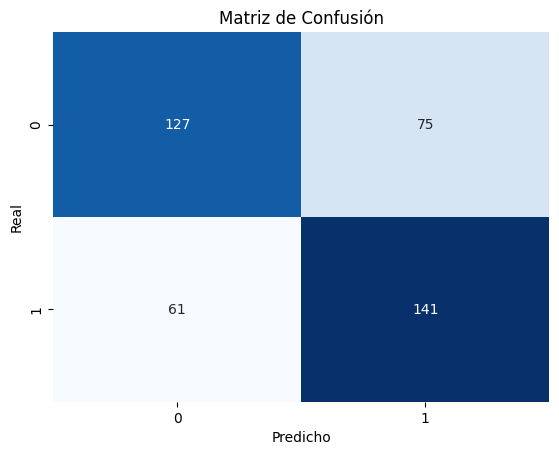

In [208]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

Validacion cruzada y ajuste de hiperparametros

Mejores hiperparámetros: {'C': 100, 'kernel': 'poly'}
Precisión del modelo SVM ajustado: 0.6905940594059405


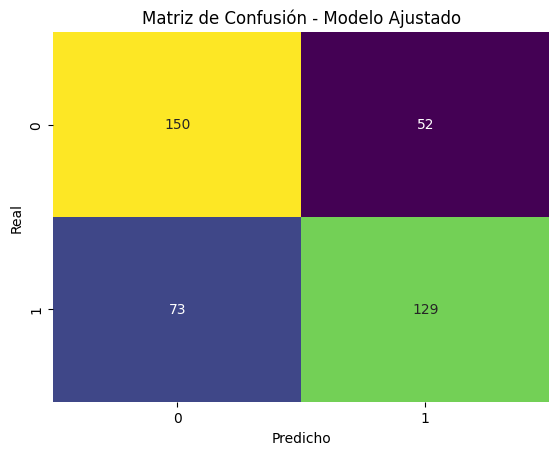

In [209]:
# Realizar validación cruzada para ajustar hiperparámetros
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados por la búsqueda
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores parámetros en todo el conjunto de entrenamiento
best_svm_model = SVC(**best_params, random_state=42)
best_svm_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el modelo ajustado
y_pred_best = best_svm_model.predict(X_test)

# Calcular y mostrar la precisión del modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Precisión del modelo SVM ajustado:", accuracy_best)

# Mostrar la nueva matriz de confusión con el modelo ajustado
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="viridis", cbar=False)
plt.title("Matriz de Confusión - Modelo Ajustado")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


#**Random Forest Classifier**

In [210]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict)
print("AUC: " + str(RFC_AUC))


Accuracy: 0.9256965944272446
AUC: 0.9236100386100388


La precisión (Accuracy) del 92.88% y el Área bajo la Curva (AUC) del 92.59% son indicadores sólidos de que el modelo es capaz de realizar buenas predicciones en tu conjunto de datos.

Validación simple

In [211]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict)
print("AUC: " + str(RFC_AUC))


Accuracy: 0.9287925696594427
AUC: 0.9269884169884169


Ajuste de Hiperparametros

Mejores Hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Precisión con Mejores Hiperparámetros: 0.8668730650154799


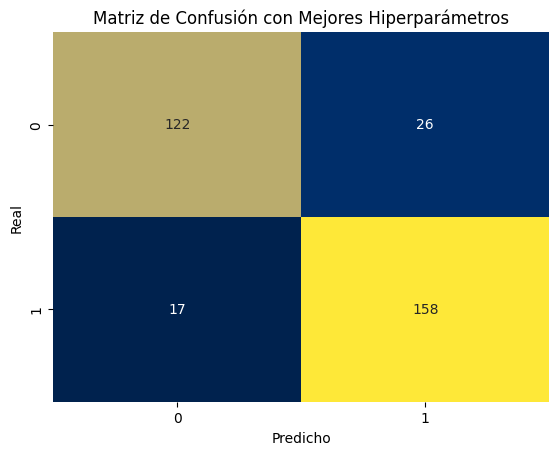

In [215]:
# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un modelo RandomForestClassifier
RFC_Model = RandomForestClassifier()

# Configurar GridSearchCV
grid_search = GridSearchCV(RFC_Model, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores Hiperparámetros:", best_params)

# Evaluar el modelo con los mejores parámetros en el conjunto de validación
best_RFC_Model = grid_search.best_estimator_
best_RFC_Predict = best_RFC_Model.predict(X_valid)

# Calcular y mostrar la precisión y la matriz de confusión con los mejores parámetros
accuracy_best = accuracy_score(y_valid, best_RFC_Predict)
print("Precisión con Mejores Hiperparámetros:", accuracy_best)

conf_matrix_best = confusion_matrix(y_valid, best_RFC_Predict)
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="cividis",cbar=False)
plt.title("Matriz de Confusión con Mejores Hiperparámetros")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


# **Clasificador k-Vecinos más Cercanos**

In [216]:
# Crear una instancia del modelo KNN
KNN_Model = KNeighborsClassifier()

# Entrenar el modelo KNN con el conjunto de entrenamiento
KNN_Model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
KNN_Predict = KNN_Model.predict(X_valid)

# Calcular y mostrar la precisión del modelo en el conjunto de validación
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Precisión del modelo KNN en el conjunto de validación:", KNN_Accuracy)

# Calcular y mostrar el área bajo la curva (AUC) en el conjunto de validación
KNN_AUC = roc_auc_score(y_valid, KNN_Predict)
print("Área bajo la curva (AUC) del modelo KNN en el conjunto de validación:", KNN_AUC)



Precisión del modelo KNN en el conjunto de validación: 0.7244582043343654
Área bajo la curva (AUC) del modelo KNN en el conjunto de validación: 0.7259073359073359


validación cruzada con 10 folds

In [217]:
k = 10
cv_result_knn = cross_val_score(KNN_Model, X_train, y_train, cv=k)

# Imprimir los resultados de la validación cruzada
print('Resultados de validación cruzada:', cv_result_knn)
print('Promedio de resultados de validación cruzada:', cv_result_knn.mean())


Resultados de validación cruzada: [0.65432099 0.68518519 0.66049383 0.66459627 0.63975155 0.68944099
 0.66459627 0.65838509 0.67701863 0.68944099]
Promedio de resultados de validación cruzada: 0.6683229813664596


Ajuste de hiperparametros

In [218]:
# Definir los hiperparámetros que deseas ajustar y sus posibles valores
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(KNN_Model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
test_accuracy = grid_search.score(X_test, y_test)
print("Precisión en el conjunto de prueba con los mejores parámetros:", test_accuracy)


Mejores parámetros: {'n_neighbors': 5, 'weights': 'distance'}
Precisión en el conjunto de prueba con los mejores parámetros: 0.6435643564356436


Matriz de confusión

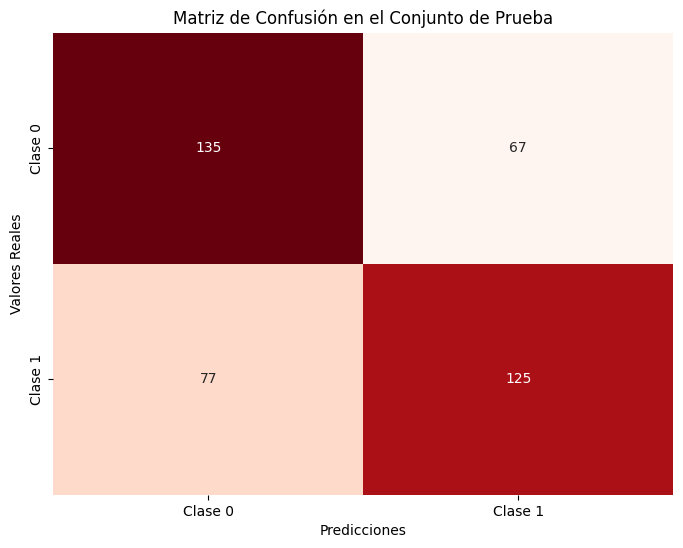

Precisión en el conjunto de prueba con los mejores parámetros: 0.6435643564356436


In [222]:
# Entrenar el modelo KNN con los mejores parámetros
best_knn_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                      weights=grid_search.best_params_['weights'])
best_knn_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = best_knn_model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', cbar=False,
            xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión en el Conjunto de Prueba')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

# Mostrar la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Precisión en el conjunto de prueba con los mejores parámetros:", test_accuracy)


#**Decision Tree**

In [223]:
# Crear una instancia del modelo de árbol de decisiones
DT_Model = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
DT_Model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
DT_Predict = DT_Model.predict(X_valid)

# Calcular y mostrar la precisión del modelo en el conjunto de validación
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Precisión del modelo de árbol de decisiones en el conjunto de validación:", DT_Accuracy)

# Calcular y mostrar el área bajo la curva ROC en el conjunto de validación
DT_AUC = roc_auc_score(y_valid, DT_Predict)
print("Área bajo la curva ROC en el conjunto de validación:", DT_AUC)


Precisión del modelo de árbol de decisiones en el conjunto de validación: 0.9040247678018576
Área bajo la curva ROC en el conjunto de validación: 0.9015250965250965


Validacion cruzada

In [224]:
# Crear una instancia del modelo de árbol de decisiones
DT_Model = DecisionTreeClassifier()

# Realizar validación cruzada
k = 10  # Número de divisiones en la validación cruzada
cv_result_dt = cross_val_score(DT_Model, X_train, y_train, cv=k)

# Imprimir los resultados de la validación cruzada
print('Resultados de validación cruzada:', cv_result_dt)
print('Promedio de resultados de validación cruzada:', cv_result_dt.mean())

# Entrenar el modelo con los datos de entrenamiento
DT_Model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
DT_Predict = DT_Model.predict(X_valid)

# Calcular y mostrar la precisión del modelo en el conjunto de validación
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Precisión del modelo de árbol de decisiones en el conjunto de validación:", DT_Accuracy)

# Calcular y mostrar el área bajo la curva ROC en el conjunto de validación
DT_AUC = roc_auc_score(y_valid, DT_Predict)
print("Área bajo la curva ROC en el conjunto de validación:", DT_AUC)


Resultados de validación cruzada: [0.64197531 0.59876543 0.64197531 0.67080745 0.69565217 0.62111801
 0.61490683 0.62111801 0.72049689 0.64596273]
Promedio de resultados de validación cruzada: 0.6472778161183959
Precisión del modelo de árbol de decisiones en el conjunto de validación: 0.9040247678018576
Área bajo la curva ROC en el conjunto de validación: 0.9015250965250965


In [225]:
# Definir los hiperparámetros que deseas ajustar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(DT_Model, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en cuadrícula en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros en el conjunto de validación
best_DT_Model = grid_search.best_estimator_
DT_Predict = best_DT_Model.predict(X_valid)

# Calcular y mostrar la precisión del modelo en el conjunto de validación
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Precisión del modelo de árbol de decisiones en el conjunto de validación:", DT_Accuracy)

# Calcular y mostrar el área bajo la curva ROC en el conjunto de validación
DT_AUC = roc_auc_score(y_valid, DT_Predict)
print("Área bajo la curva ROC en el conjunto de validación:", DT_AUC)


Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Precisión del modelo de árbol de decisiones en el conjunto de validación: 0.8080495356037152
Área bajo la curva ROC en el conjunto de validación: 0.8082625482625482


Matriz de confusion

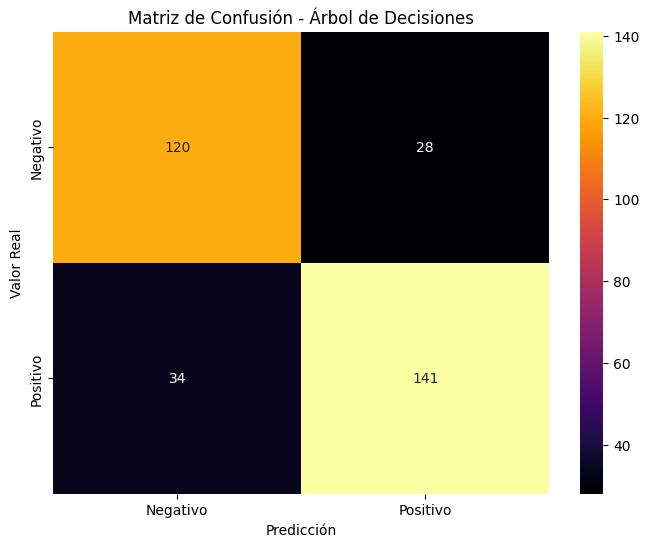

In [227]:
# Obtener las predicciones con el mejor modelo de árbol de decisiones
best_DT_Predict = best_DT_Model.predict(X_valid)

# Calcular la matriz de confusión
cm = confusion_matrix(y_valid, best_DT_Predict)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='inferno',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusión - Árbol de Decisiones')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


#**Presición de los modelos**

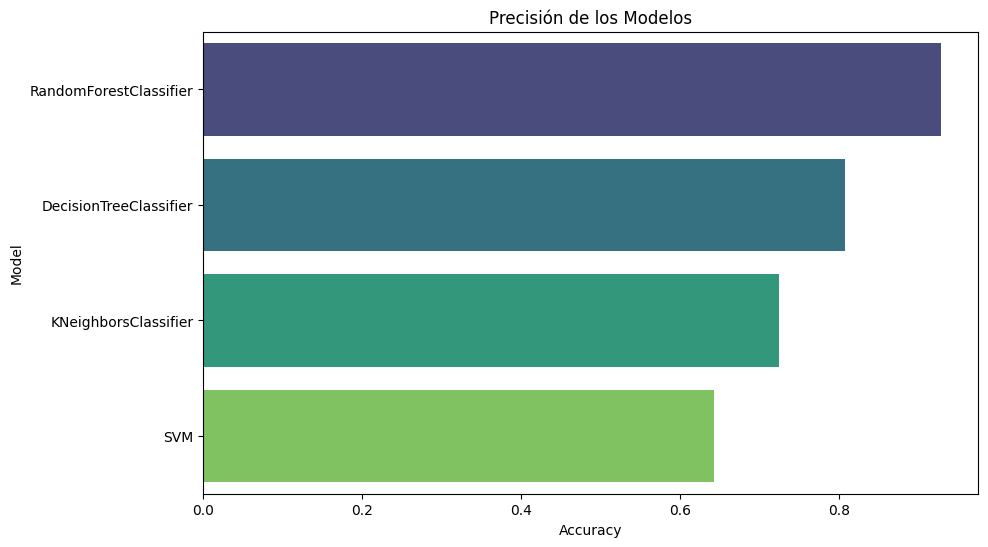

In [228]:
# Crear DataFrame para la precisión del modelo
model_performance_accuracy = pd.DataFrame({'Model': ['DecisionTreeClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'SVM'],
                                            'Accuracy': [DT_Accuracy, KNN_Accuracy, RFC_Accuracy, test_accuracy]})

# Ordenar DataFrame por precisión en orden descendente
model_performance_accuracy = model_performance_accuracy.sort_values(by="Accuracy", ascending=False)

# Visualizar los resultados de la precisión
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=model_performance_accuracy, palette='viridis').set_title('Precisión de los Modelos')

# Mostrar el modelo con la mayor precisión
plt.show()


In [229]:
model_performance_accuracy = model_performance_accuracy.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print(model_performance_accuracy)


                    Model  Accuracy
0  RandomForestClassifier  0.928793
1  DecisionTreeClassifier  0.808050
2    KNeighborsClassifier  0.724458
3                     SVM  0.643564


#**Precisión del ensamble por votación**

In [230]:
# Crear instancias de los modelos
svm_model = SVC(random_state=1)
rfc_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

# Crear el ensamble por votación
voting_clf = VotingClassifier(
    estimators=[('svm', svm_model), ('rfc', rfc_model), ('knn', knn_model), ('dt', dt_model)],
    voting='hard'  # Puedes cambiar a 'soft' si los modelos tienen métodos de predicción de probabilidad
)

# Entrenar el ensamble por votación
voting_clf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
voting_predictions = voting_clf.predict(X_test)

# Calcular la precisión del ensamble
ensemble_accuracy = accuracy_score(y_test, voting_predictions)
print("Precisión del ensamble por votación en el conjunto de prueba:", ensemble_accuracy)


Precisión del ensamble por votación en el conjunto de prueba: 0.7079207920792079
